In [36]:
from astropy.io import fits as astro_fits  
from astropy.io.fits import getdata

import copy
import glob

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import matplotlib as mpl 
from matplotlib.collections import LineCollection


import numpy as np
from IPython.display import HTML

import astropy.table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize, LogStretch 

#These packages are for Using TrackPy
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp 

from numpy import sqrt 


In [2]:
List_2 = glob.glob(r'C:\Users\14242\2022 Summer Internship\Sun Pics Part 2 (10 pics)\*')

In [3]:
data_average = [] 
data_median = [] 
for Polar in List_2: 
    Polardata = getdata(Polar) 
    data_average.append(Polardata - np.average(Polardata)) 
    data_median.append(Polardata - np.median(Polardata)) 

In [4]:
Arr=np.array(data_average)

In [5]:
#For this I want to know how to create a loop for the difference
Diff = Arr[2] - Arr[1]

In [6]:
#To look how Diff would look like
#Diff

In [7]:
Diff = [] 
for i in range (1,len(Arr)-1): 
    Diff.append(Arr[i+1]-Arr[i])

In [8]:
#Just a plot for the Difference from the start

#plt.figure(figsize=(10,10))
#plt.imshow(Diff[0],vmin = -1, vmax = 1)  
#plt.colorbar()
#plt.show()

In [9]:
#This is to clean up the graph  
#Talk to Milo about the limits of the minmass
f = tp.locate(Arr[0], 11, invert = True, minmass = 70)

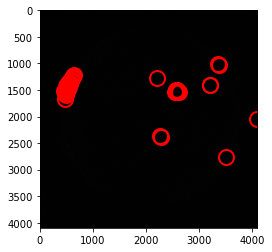

In [10]:
#This gives us the graph
tp.annotate(f,Arr[0]); 

In [11]:
#This is to find the specific  data for the one partical(easier to look at data)
f.iloc[34]

y           1504.197090
x           2591.875661
mass          75.525738
size           2.434594
ecc            0.321339
signal         4.395678
raw_mass   -1181.546494
ep            -0.089743
Name: 15440, dtype: float64

In [12]:
#Just created an array for the original radius of the sun. 
R = 1625.691406

In [13]:
#Use trackPy/Sunpy and look at the header for the new dimentions of the  
#Diagram, with this we can use restrictions and track the partical

In [14]:
#Tells us the frames and features of the photos
r = tp.batch(Arr[:10],11,minmass = 50, invert = True); 


Frame 9: 139 features


In [15]:
# The 5 here is the max displacement that the partical can trael 
#This tends to be small so it dosnet slow down the program  
#memeory means the amount of frames that the partical can be missed 
#this is useful to give us the partical within the header
t = tp.link(r,5,memory = 9)

Frame 9: 139 trajectories present.


In [16]:
t.head 

<bound method NDFrame.head of                 y            x        mass      size       ecc    signal  \
0      692.731343  1109.121269   53.547349  2.945082  0.338276  2.197839   
100   1587.005459   497.195415   91.510021  2.855700  0.061035  3.496562   
98    1573.733840  3641.583650   52.548331  2.865489  0.471381  2.297741   
97    1570.725694  2568.932292   57.543419  3.121665  0.489026  2.397642   
96    1568.801406  2592.922671   56.844107  3.060319  0.108850  2.297741   
...           ...          ...         ...       ...       ...       ...   
1185  1404.645594  3190.159004   62.195084  2.969836  0.115198  2.382953   
1186  1405.854271   555.134243  165.972704  2.896640  0.289998  6.314826   
1187  1408.572741   515.320061   77.803428  3.265674  0.460669  3.336135   
1181  1383.453382   534.937843   65.173775  3.030919  0.374255  3.931873   
1277  3490.807175  2745.547085   53.139861  3.147353  0.315110  1.668067   

         raw_mass        ep  frame  particle  
0     -142

In [17]:
#This code with (t,5) filters out the particals that are spontanious 
#Will have to look at the data to see what frames are considered spontanious
t1 = tp.filter_stubs(t,5) 
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 549
After: 66


plt.figure()
tp.mass_size(t1.groupby('particle').mean());

In [18]:
#Plots those figures mass and size (Not important as of now)
#plt.figure()
#tp.mass_size(t1.groupby('particle').mean())

In [19]:
#This cell will be for the code to filter out the particals that are not needed 
t2 = t1[((t1['mass'] >60 ) & (t1['size'] < 3.1) &
         (t1['ecc'] < 1))]

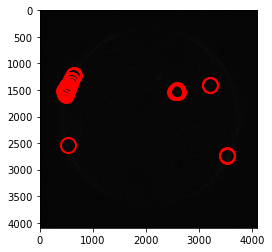

In [20]:
plt.figure()
tp.annotate(t2[t2['frame'] == 0], Arr[1]);

In [21]:
#This is a equation for the radius of the particals INSIDE of the Circle 
iloc_valid = []

for i in range(len(t)): #I changed f into t 
    r = np.sqrt((t['x'].iloc[i]- 2070.828369)**2 + (t['y'].iloc[i] - 2008.760620)**2)
    if r<R: 
        print(r, t['particle'].iloc[i])
        iloc_valid.append(i)
    else: 
        print ('N/A')
         

    

N/A
N/A
N/A
663.3114756902536 3
682.7492735659819 4
N/A
664.4099873021468 6
N/A
700.9001853826223 8
N/A
N/A
712.8603918898916 11
674.5308589124434 12
664.4477202783263 13
N/A
673.7017349801447 15
N/A
727.0843278975366 17
714.4315619080177 18
N/A
702.7959270937081 20
N/A
694.6035245764971 22
N/A
N/A
N/A
711.6682277237475 26
N/A
N/A
707.0836079331443 29
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
1589.5808747957453 46
1601.6253806937223 47
1622.3342290833543 48
N/A
N/A
1603.865117646188 51
N/A
N/A
N/A
1623.4419812767803 55
N/A
1619.920029387272 57
N/A
1320.5114266516298 59
N/A
N/A
410.7397136247592 62
430.3002097893792 63
N/A
1620.4442424688423 65
N/A
725.3100280235079 67
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
724.7377362923065 79
1600.2469554369873 80
N/A
737.9834362823506 82
N/A
746.204959548023 84
N/A
N/A
N/A
N/A
690.5602794142762 89
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
1610.3129876214955 100
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N

In [22]:
#The particals # that are valid from the loop in top
#iloc_valid[10]

In [23]:
#talkes into account ALL the Particals not the one we need
#plt.figure()
#tp.plot_traj(t.iloc[iloc_valid]); 

In [24]:
#These next code will be plotting lightcurve (signal and mass)

In [25]:
# key note (NO COLUMN IN SERIES)
#print (t['frame'].iloc[iloc_valid])

In [26]:
#Hofeully code that will help me see the frames 

#t['frame'].iloc[iloc_valid].value_counts() 

In [27]:
#t['particle'].iloc[iloc_valid].value_counts() 

In [28]:
#t['signal'].iloc[iloc_valid].value_counts()

Text(0.5, 0, 'Frame')

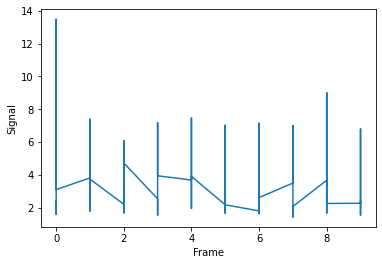

In [29]:
#The reason why the garph is like this is bc its grapging all the particals on oen go 
fig, ax = plt.subplots() 

Fra =  t['frame'].iloc[iloc_valid]
Sig =  t['signal'].iloc[iloc_valid]
ax.plot(Fra,Sig) 
plt.ylabel('Signal') 
plt.xlabel('Frame')  




In [40]:
#Grapging light curve 
if kwargs.get('pos columns') is None: 
    kwargs['pos columns'] = ['frame', 'signal'] 
    
if kwargs.get('colorby') == 'frame': 
    raise NotImplemened ("3d trajectory plots cannot be colored by frame") 
return plot_traj(*args, **kwargs)

NameError: name 'kwargs' is not defined

In [45]:
def annotate (t.iloc[iloc_valid],color=None, invert=False, ax=None, split_category=None, split_thresh=None,
             imshow_style={}, plot_style{}):

SyntaxError: invalid syntax (1728670296.py, line 1)